# Avocado project :

In [1]:
# Importing important models :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore , boxcox
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Getting the dataset :
df = pd.read_csv('avocado.csv.zip')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
# Checking the  information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
# Checking the null values :
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
# Checking the duplicated value :
df.duplicated().sum()

0

In [6]:
# Checking the statistics :
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
# Checking the correlation :
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [8]:
# Here , I will delete unimportant columns like 'Unnamed: 0', 'Date', 'XLarge Bags' 

In [9]:
df = df.drop(['Unnamed: 0' , 'Date', 'XLarge Bags'] , axis = 1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,organic,2018,WestTexNewMexico


# EDA :

In [10]:
# Checking the value counts of 'type' column :
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [11]:
# Checking the value counts of 'region' column :
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

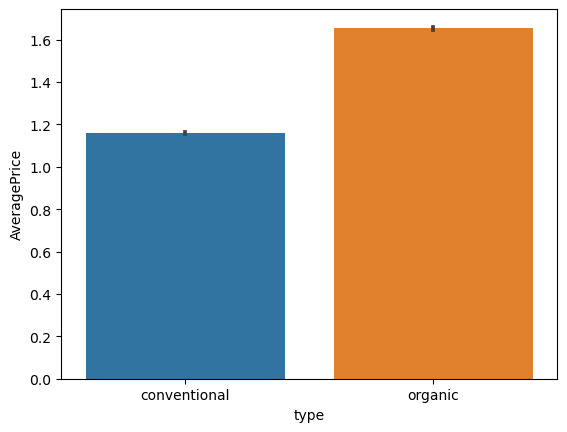

In [12]:
# Checking the  relation of type and average price
sns.barplot( data = df , x = 'type' , y = 'AveragePrice')
plt.show()

In [1]:
# So, the organic type of Avocado has more price  

In [13]:
df.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015,Albany


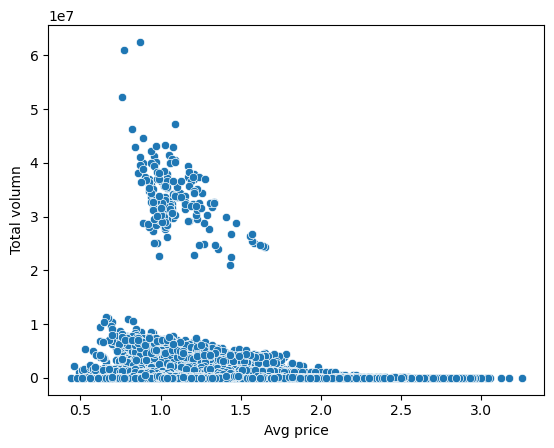

In [14]:
# Checking the relation between  AveragePrice and Total Volumn
sns.scatterplot(data = df , x = 'AveragePrice' , y = 'Total Volume')
plt.xlabel('Avg price')
plt.ylabel('Total volumn')
plt.show()

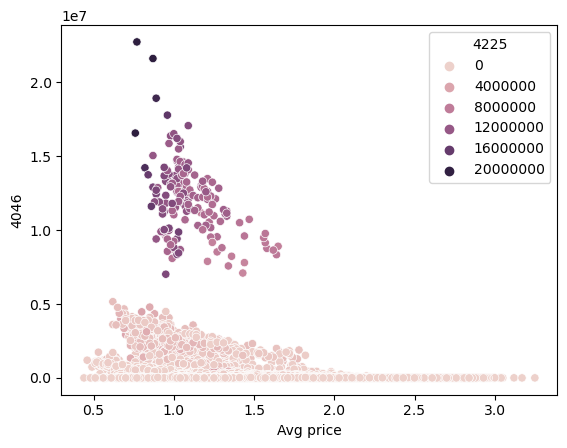

In [15]:
# Checking the relation betweenAveragePrice , 4046 and 4225
sns.scatterplot(data = df , x = 'AveragePrice' , y = '4046' , hue = '4225')
plt.xlabel('Avg price')
plt.ylabel('4046')
plt.show()

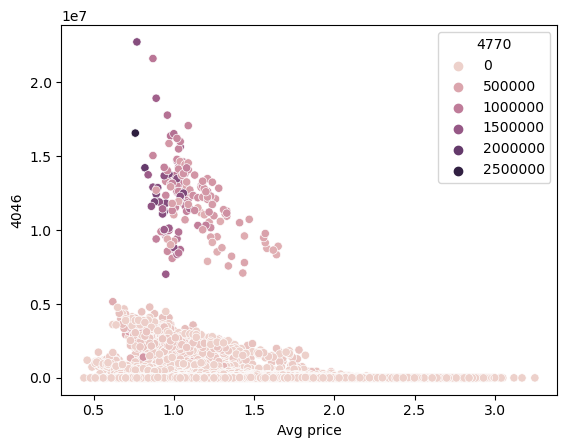

In [16]:
sns.scatterplot(data = df , x = 'AveragePrice' , y = '4046' , hue = '4770')
plt.xlabel('Avg price')
plt.ylabel('4046')
plt.show()

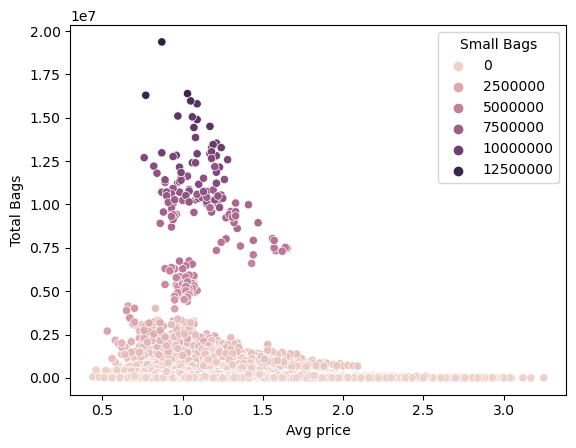

In [17]:
sns.scatterplot(data = df , x = 'AveragePrice' , y = 'Total Bags' , hue = 'Small Bags')
plt.xlabel('Avg price')
plt.ylabel('Total Bags')
plt.show()

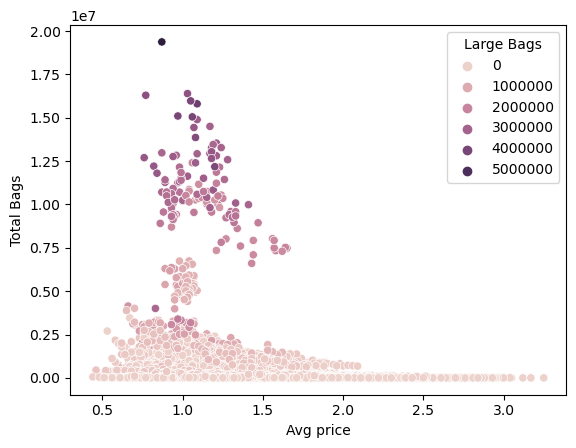

In [18]:
sns.scatterplot(data = df , x = 'AveragePrice' , y = 'Total Bags' , hue = 'Large Bags')
plt.xlabel('Avg price')
plt.ylabel('Total Bags')
plt.show()

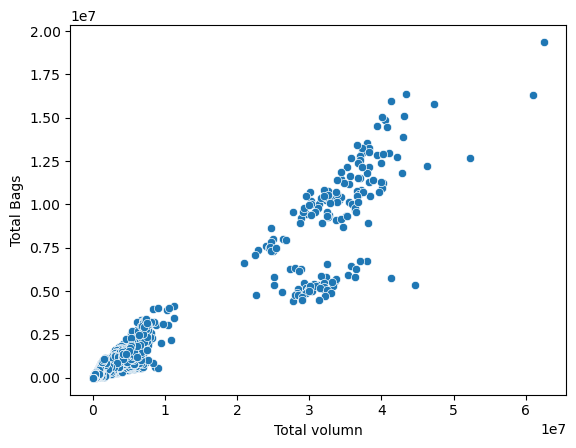

In [19]:
sns.scatterplot(data = df , x = 'Total Volume' , y = 'Total Bags' )
plt.xlabel('Total volumn')
plt.ylabel('Total Bags')
plt.show()

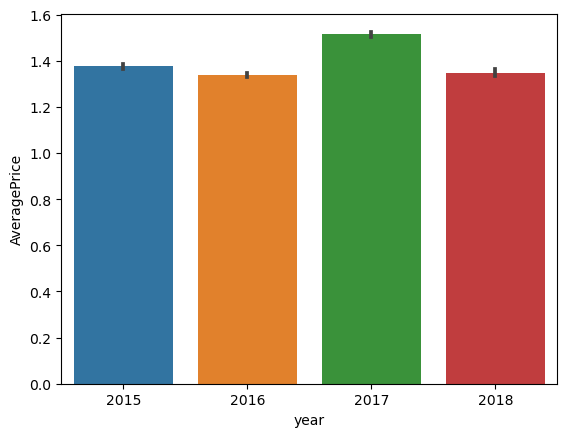

In [20]:
# Checking the AveragePrice in each year
sns.barplot(data = df , x = 'year' , y = 'AveragePrice' )
plt.xlabel('year')
plt.ylabel('AveragePrice')
plt.show()

In [2]:
#  In 2017 , AveragePrice was highest

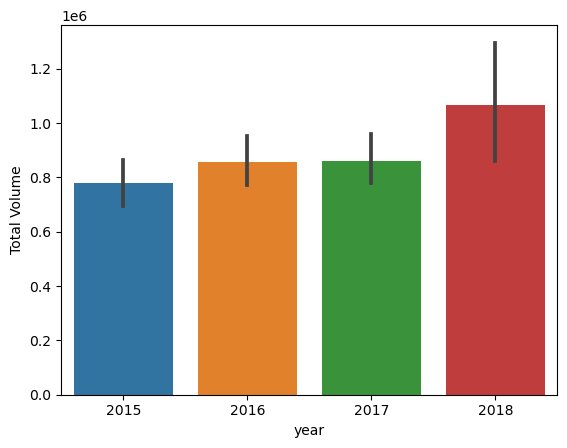

In [21]:
# Checking the total volumn in each year
sns.barplot(data = df , x = 'year' , y = 'Total Volume' )
plt.xlabel('year')
plt.ylabel('Total Volume')
plt.show()

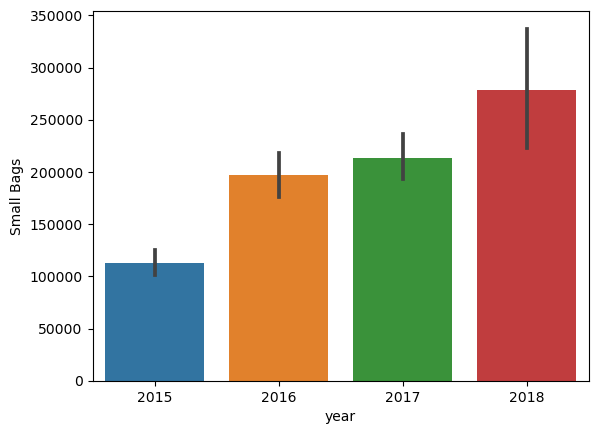

In [22]:
sns.barplot(data = df , x = 'year' , y = 'Small Bags'  )
plt.xlabel('year')
plt.ylabel('Small Bags')
plt.show()

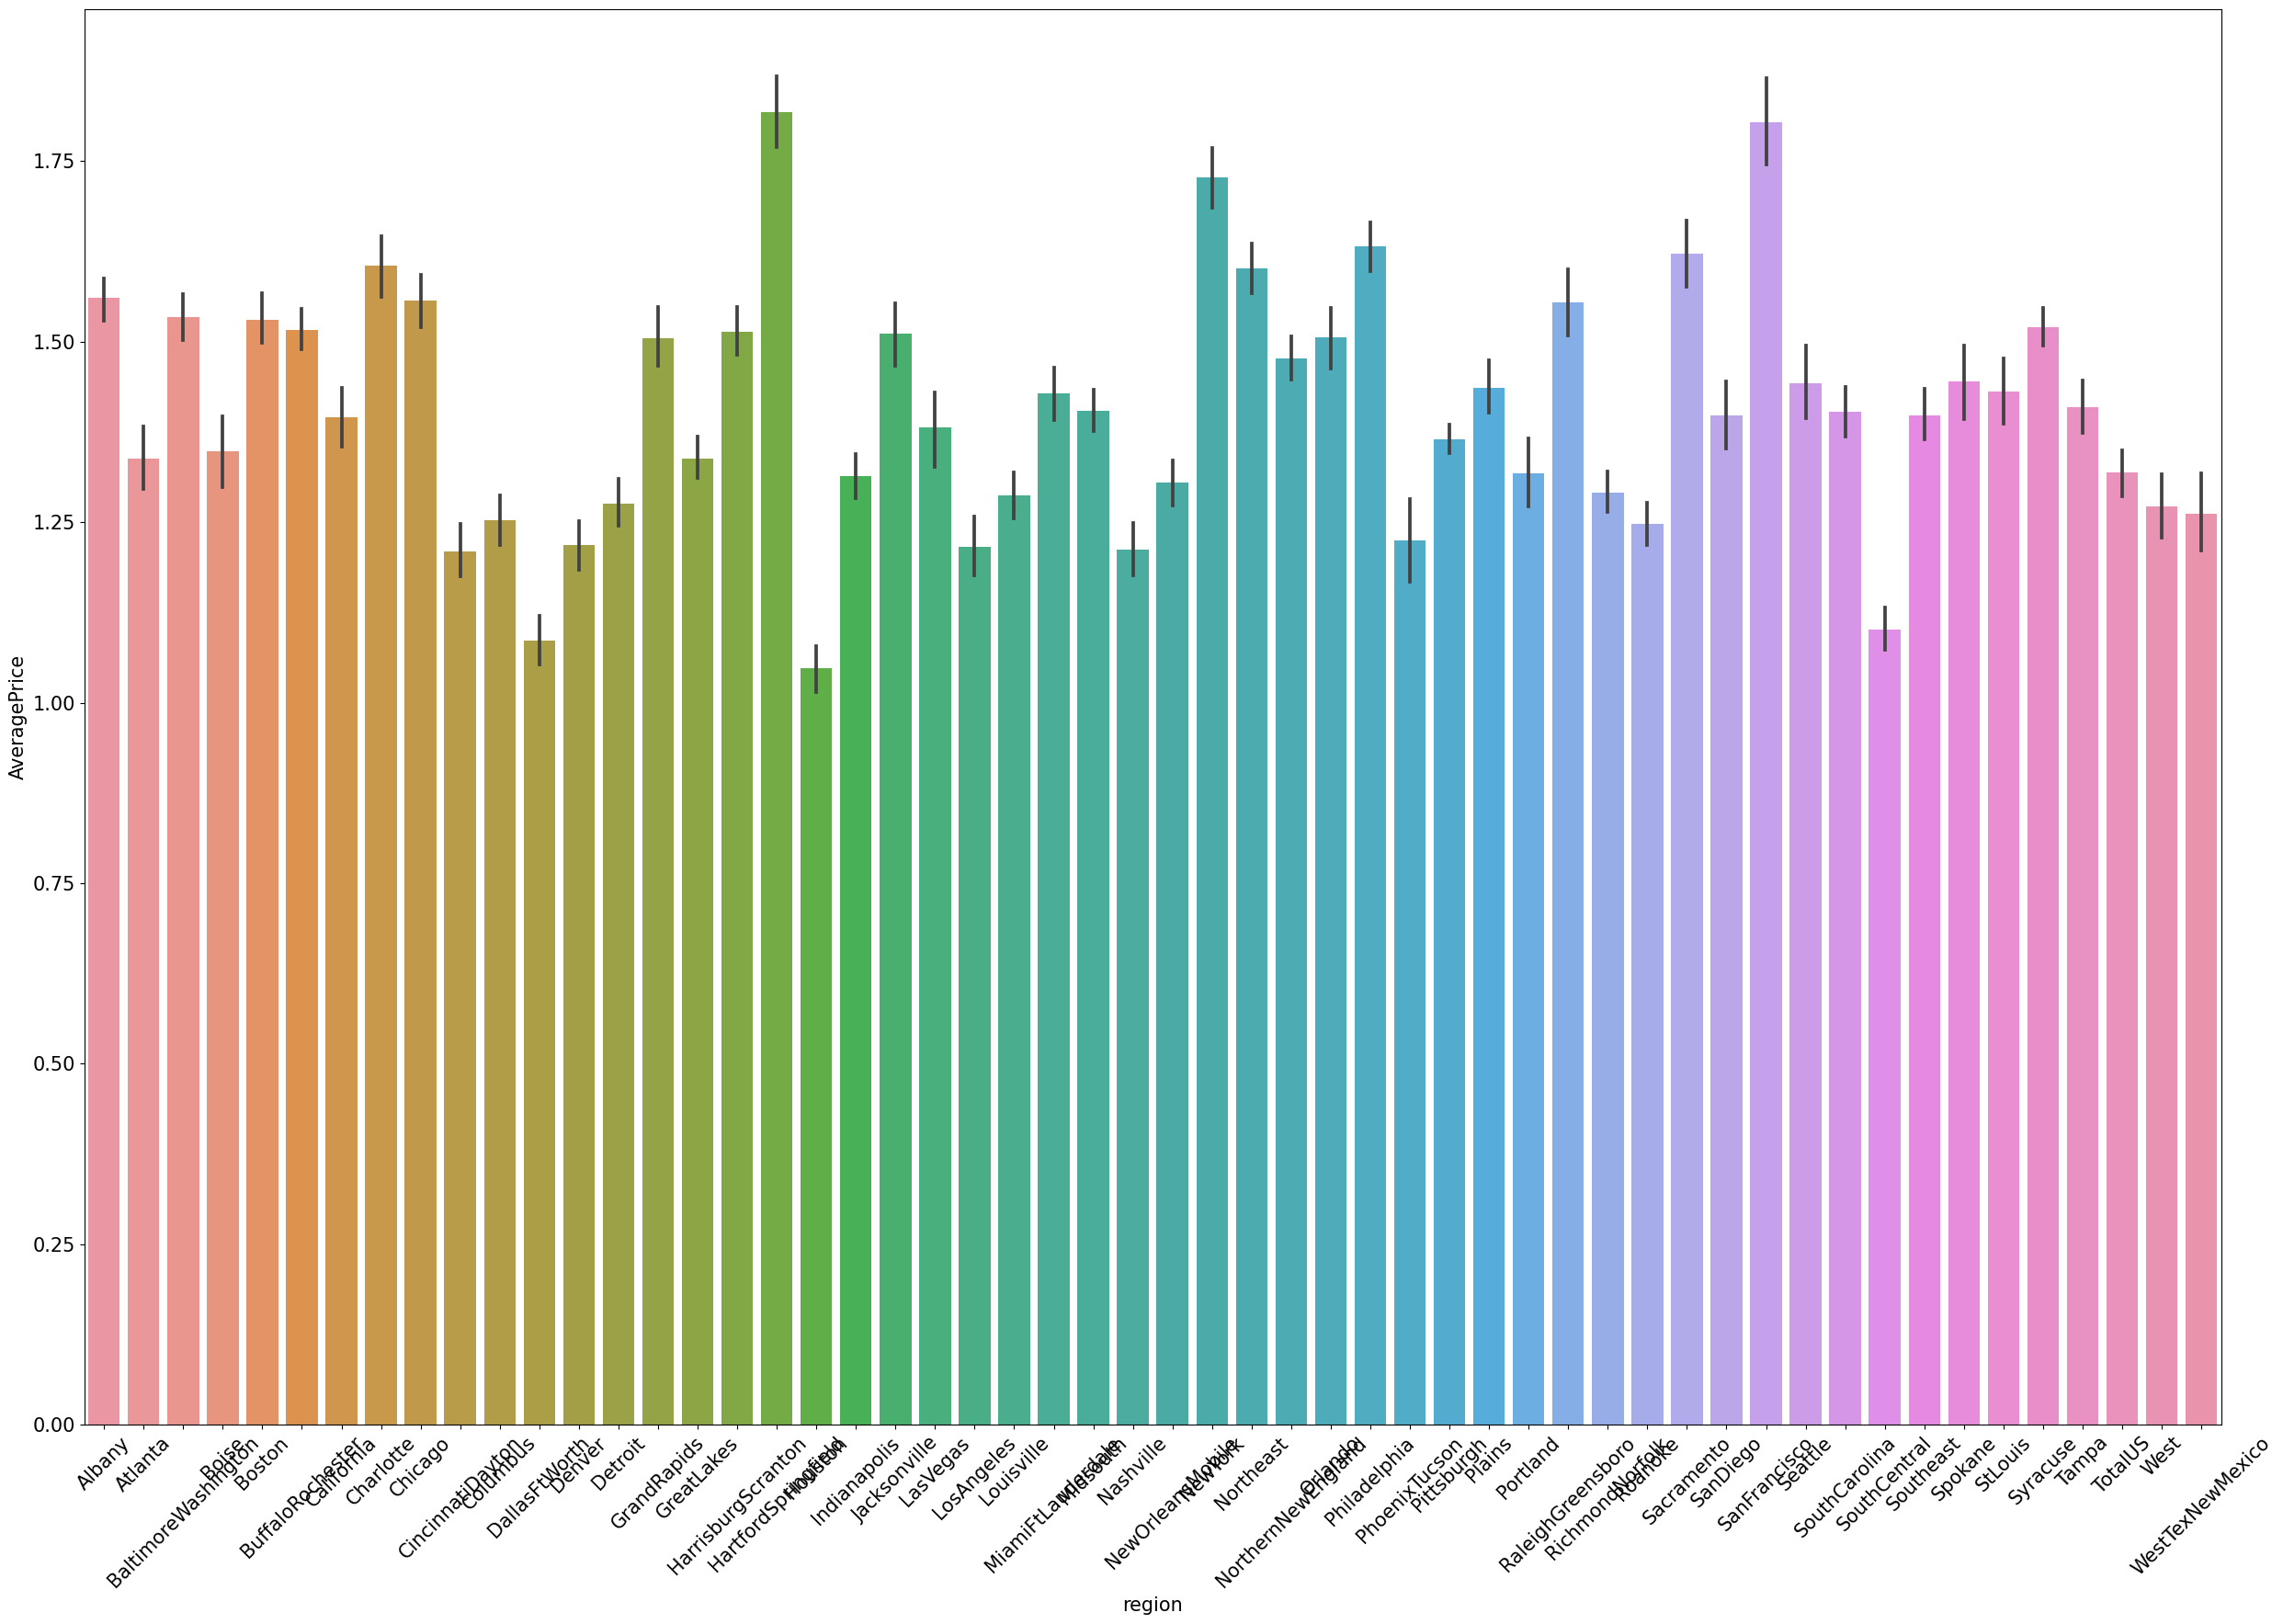

In [23]:
# Checking the relation between region and AveragePrice
plt.rc("font", size=15)
plt.figure(figsize = (30,20))
sns.barplot( data = df , x = 'region' , y = 'AveragePrice')
plt.xticks(rotation = 45)
plt.show()

In [24]:
df.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015,Albany


# Data Preprocessing :

In [3]:
# I will map the values of 'type' column . 'conventional' : 1 , 'organic' : 2

In [25]:
df['type'] = df['type'].map({'conventional': 1 , 'organic':2})
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,1,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,1,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,1,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,1,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,1,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,2,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,2,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,2,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,2,2018,WestTexNewMexico


In [4]:
# I will map the values of 'region' also in the descending order of the AvgPrice of each region

In [26]:
avg_price_per_region = df.groupby('region')['AveragePrice'].mean()
avg_price_per_region

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Columbus               1.252781
DallasFtWorth          1.085592
Denver                 1.218580
Detroit                1.276095
GrandRapids            1.505000
GreatLakes             1.338550
HarrisburgScranton     1.513284
HartfordSpringfield    1.818639
Houston                1.047929
Indianapolis           1.313994
Jacksonville           1.510947
LasVegas               1.380917
LosAngeles             1.216006
Louisville             1.286686
MiamiFtLauderdale      1.428491
Midsouth               1.404763
Nashville              1.212101
NewOrleansMobile       1.304793
NewYork                1.727574
Northeast              1.601923
NorthernNewEngland     1.477396
O

In [27]:
# Sorting all the regions in descending order of AvgPrice
sorted_regions = (
    avg_price_per_region.sort_values(ascending=False).reset_index()
)

# Give the rank to each region according to the AvgPrice . The region with highest AvgPrice has the highest rank
price_to_region_map = {
  price: f"{region} {len(sorted_regions) - i}" for i, (price, region) in sorted_regions.iterrows()
}
filtered_map = {key: value.split()[1] if len(value.split()) > 1 else value for key, value in price_to_region_map.items()}

# Map region values based on the Avgprice ranking
df['region'] = df['region'].map(filtered_map)

In [28]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,1,2015,47
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,1,2015,47
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,1,2015,47
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,1,2015,47
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,1,2015,47
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,2,2018,11
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,2,2018,11
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,2,2018,11
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,2,2018,11


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   type          18249 non-null  int64  
 9   year          18249 non-null  int64  
 10  region        18249 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 1.5+ MB


In [30]:
# Changing the datatype of region to int from object
df['region'] = df['region'].astype(int)

In [31]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,1,2015,47
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,1,2015,47
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,1,2015,47
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,1,2015,47
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,1,2015,47
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,2,2018,11
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,2,2018,11
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,2,2018,11
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,2,2018,11


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   type          18249 non-null  int64  
 9   year          18249 non-null  int64  
 10  region        18249 non-null  int32  
dtypes: float64(8), int32(1), int64(2)
memory usage: 1.5 MB


In [33]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
type            0
year            0
region          0
dtype: int64

# Handling Outliers :

AveragePrice       Axes(0.125,0.653529;0.133621x0.226471)
Total Volume    Axes(0.285345,0.653529;0.133621x0.226471)
4046             Axes(0.44569,0.653529;0.133621x0.226471)
4225            Axes(0.606034,0.653529;0.133621x0.226471)
4770            Axes(0.766379,0.653529;0.133621x0.226471)
Total Bags         Axes(0.125,0.381765;0.133621x0.226471)
Small Bags      Axes(0.285345,0.381765;0.133621x0.226471)
Large Bags       Axes(0.44569,0.381765;0.133621x0.226471)
type            Axes(0.606034,0.381765;0.133621x0.226471)
year            Axes(0.766379,0.381765;0.133621x0.226471)
region                 Axes(0.125,0.11;0.133621x0.226471)
dtype: object

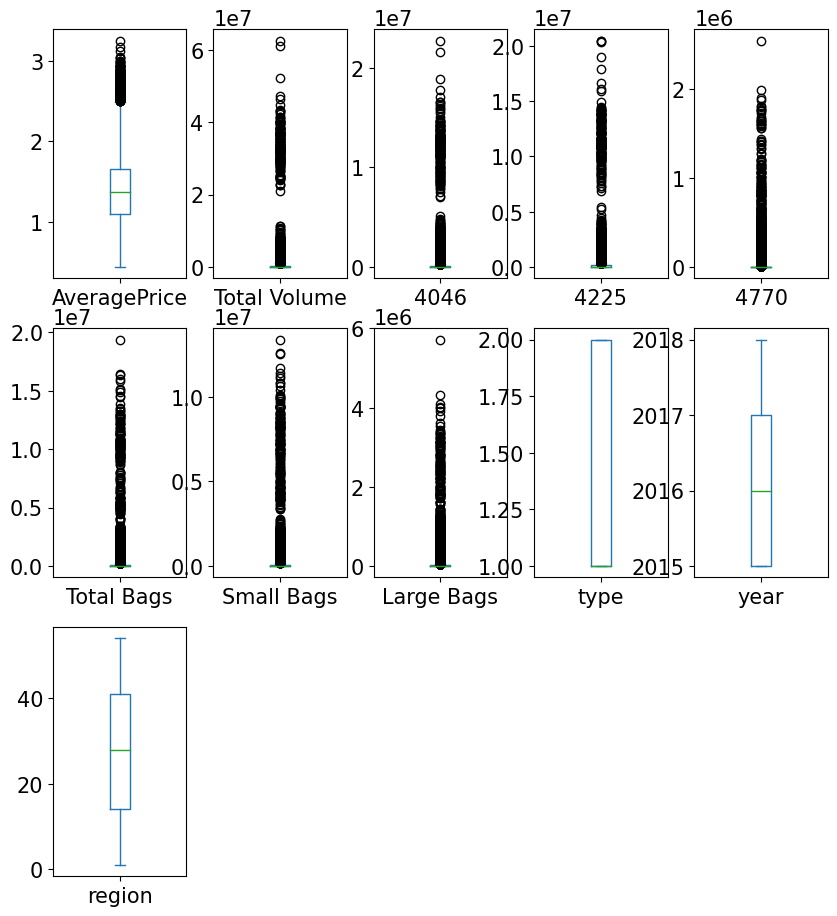

In [34]:
# I have used boxplot to check which columns has outliers 
df.plot(kind = 'box', subplots = True , layout = (3,5), figsize = (10,11))

In [35]:
# I have find out the z_score values of the dataset
z = np.abs(zscore(df))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.999836,1.221282,1.250979
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.999836,1.221282,1.250979
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.999836,1.221282,1.250979
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.999836,1.221282,1.250979
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.999836,1.221282,1.250979
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,1.000164,1.970504,1.058842
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,1.000164,1.970504,1.058842
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,1.000164,1.970504,1.058842
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,1.000164,1.970504,1.058842


In [36]:
threshold = 3
print(np.where(z>3))

(array([  346,   359,   783, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 4, ..., 0, 0, 0], dtype=int64))


In [37]:
new_df = df[(z<3).all(axis = 1)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,1,2015,47
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,1,2015,47
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,1,2015,47
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,1,2015,47
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,1,2015,47
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,2,2018,11
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,2,2018,11
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,2,2018,11
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,2,2018,11


# Skewness Handling :

In [38]:
new_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
count,17736.000000,1.773600e+04,1.773600e+04,1.773600e+04,17736.000000,1.773600e+04,1.773600e+04,17736.000000,17736.000000,17736.000000,17736.000000
mean,1.404351,4.820537e+05,1.623076e+05,1.716661e+05,11722.604911,1.363553e+05,1.062005e+05,28473.751347,1.506991,2016.141689,27.639434
std,0.385351,1.058795e+06,4.560087e+05,4.103448e+05,35897.149301,2.985755e+05,2.455283e+05,74426.252300,0.499965,0.941088,15.622534
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,2015.000000,1.000000
25%,1.110000,1.063288e+04,8.322375e+02,2.915842e+03,0.000000,5.007398e+03,2.778635e+03,115.965000,1.000000,2015.000000,14.000000
50%,1.380000,1.025373e+05,7.947535e+03,2.733058e+04,169.365000,3.829613e+04,2.509757e+04,2478.860000,2.000000,2016.000000,28.000000
75%,1.660000,4.001392e+05,1.005207e+05,1.317465e+05,5433.930000,1.036837e+05,7.925749e+04,19438.065000,2.000000,2017.000000,41.000000
max,2.610000,8.362504e+06,4.085859e+06,3.894802e+06,344488.510000,2.782725e+06,2.348868e+06,781447.290000,2.000000,2018.000000,54.000000


In [39]:
# Here ,I can see the Total Volumn has skewness . I will handle the skewness using boxcox
new_df['Total Volume'] = boxcox(new_df['Total Volume'], 0)

In [40]:
new_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
count,17736.000000,17736.000000,1.773600e+04,1.773600e+04,17736.000000,1.773600e+04,1.773600e+04,17736.000000,17736.000000,17736.000000,17736.000000
mean,1.404351,11.224951,1.623076e+05,1.716661e+05,11722.604911,1.363553e+05,1.062005e+05,28473.751347,1.506991,2016.141689,27.639434
std,0.385351,2.190663,4.560087e+05,4.103448e+05,35897.149301,2.985755e+05,2.455283e+05,74426.252300,0.499965,0.941088,15.622534
min,0.440000,4.437461,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,2015.000000,1.000000
25%,1.110000,9.271706,8.322375e+02,2.915842e+03,0.000000,5.007398e+03,2.778635e+03,115.965000,1.000000,2015.000000,14.000000
50%,1.380000,11.537982,7.947535e+03,2.733058e+04,169.365000,3.829613e+04,2.509757e+04,2478.860000,2.000000,2016.000000,28.000000
75%,1.660000,12.899568,1.005207e+05,1.317465e+05,5433.930000,1.036837e+05,7.925749e+04,19438.065000,2.000000,2017.000000,41.000000
max,2.610000,15.939268,4.085859e+06,3.894802e+06,344488.510000,2.782725e+06,2.348868e+06,781447.290000,2.000000,2018.000000,54.000000


# Correlation :

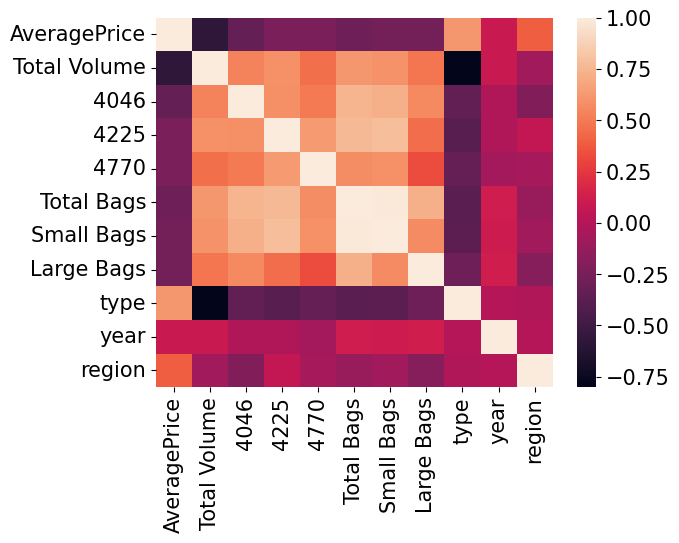

In [41]:
# Checking the correlation
sns.heatmap(new_df.corr())
plt.show()

# Doing Regression For Predicting AveragePrice :

In [44]:
# Importing different algorithms and functions :
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [43]:
# Creating X and y :
X = new_df.drop('AveragePrice', axis = 1)
y = new_df['AveragePrice']

# Data Preprocessing :

In [45]:
# Importing Column Transformer :
from sklearn.compose import  ColumnTransformer

In [45]:
scaler = StandardScaler()

In [59]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,11.070329,1036.74,54454.85,48.16,8696.87,8603.62,93.25,1,2015,47
1,1.35,10.912849,674.28,44638.81,58.33,9505.56,9408.07,97.49,1,2015,47
2,0.93,11.680304,794.70,109149.67,130.50,8145.35,8042.21,103.14,1,2015,47
3,1.08,11.277104,1132.00,71976.41,72.58,5811.16,5677.40,133.76,1,2015,47
4,1.28,10.840357,941.48,43838.39,75.78,6183.95,5986.26,197.69,1,2015,47


In [46]:
# Scaling the data
preprocessor = ColumnTransformer(
transformers = [
    ('standerdization' , scaler , [0,1,2,3,4,5,6,7])
],
remainder = 'passthrough'
)

# Using different Models :

# Using LinearRegression :

In [47]:
lr_score = []
for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = i)
    lr = LinearRegression()
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    lr.fit(X_train_dummy , y_train)
    y_pred = lr.predict(X_test_dummy)
    lr_score.append(r2_score(y_test , y_pred))

In [48]:
np.argmax(lr_score)

95

In [49]:
lr_score[np.argmax(lr_score)]

0.5778136221061523

# Using Ridge Regression :

In [50]:
r_score = []
for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = i)
    r = Ridge()
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    r.fit(X_train_dummy , y_train)
    y_pred = r.predict(X_test_dummy)
    r_score.append(r2_score(y_test , y_pred))

In [51]:
np.argmax(r_score)

95

In [52]:
r_score[np.argmax(r_score)]

0.5774751225124661

# Using KNeighboursRegressor :

In [53]:
kn_score = []
for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = i)
    kn = KNeighborsRegressor(n_neighbors=6, weights='distance')
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    kn.fit(X_train_dummy , y_train)
    y_pred = kn.predict(X_test_dummy)
    kn_score.append(r2_score(y_test , y_pred))

In [54]:
np.argmax(kn_score)

78

In [55]:
kn_score[np.argmax(kn_score)]

0.8502782356761779

# Using SupportVector Regressor :

In [57]:
X_train_s , X_test_s , y_train_s , y_test_s = train_test_split(X,y,test_size = 0.3 , random_state = 42)
svr = SVR(kernel='rbf', degree=3, gamma='scale')
X_train_dummy = preprocessor.fit_transform(X_train_s)
X_test_dummy = preprocessor.transform(X_test_s)
svr.fit(X_train_dummy , y_train_s)
y_pred = svr.predict(X_test_dummy)
print(r2_score(y_test_s , y_pred))

0.17950074833249796


# Using DecisionTree Regressor ;

In [58]:
dt_score = []
for i  in range(50):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = i)
    dt = DecisionTreeRegressor(max_depth = 10)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    dt.fit(X_train_dummy , y_train)
    y_pred = dt.predict(X_test_dummy)
    dt_score.append(r2_score(y_test , y_pred))

In [60]:
np.argmax(dt_score)

18

In [62]:
dt_score[np.argmax(dt_score)]

0.7545505068474503

# Using RandomForestRegressor :

In [63]:
rf_score = []
for i  in range(10):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = i)
    rf = RandomForestRegressor(n_estimators = 100 ,max_depth = 10)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    rf.fit(X_train_dummy , y_train)
    y_pred = rf.predict(X_test_dummy)
    rf_score.append(r2_score(y_test , y_pred))

In [67]:
np.argmax(rf_score)

5

In [69]:
rf_score[np.argmax(rf_score)]

0.8050746636969566

In [72]:
X_train_s , X_test_s , y_train_s , y_test_s = train_test_split(X,y,test_size = 0.3 , random_state = 78)
rf = RandomForestRegressor(n_estimators = 500 ,max_depth = 10)
X_train_dummy = preprocessor.fit_transform(X_train_s)
X_test_dummy = preprocessor.transform(X_test_s)
rf.fit(X_train_dummy , y_train_s)
y_pred = rf.predict(X_test_dummy)
print(r2_score(y_test_s , y_pred))

0.7957532381432457


# Using GradientBoostingRegressor :

In [47]:
gb_score = []
for i  in range(10):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = i)
    gb = GradientBoostingRegressor(n_estimators = 100 ,max_depth = 1)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    gb.fit(X_train_dummy , y_train)
    y_pred = gb.predict(X_test_dummy)
    gb_score.append(r2_score(y_test , y_pred))

In [48]:
gb_score

[0.5960143489692327,
 0.5984972438652113,
 0.5881812567171952,
 0.6048854515321219,
 0.5930816292442322,
 0.594639796772127,
 0.6037040743368756,
 0.5974581129339807,
 0.5867666860523917,
 0.6016209892350015]

In [58]:
X_train_s , X_test_s , y_train_s , y_test_s = train_test_split(X,y,test_size = 0.2 , random_state = 78)
gb = GradientBoostingRegressor(n_estimators = 100 ,max_depth = 1)
X_train_dummy = preprocessor.fit_transform(X_train_s)
X_test_dummy = preprocessor.transform(X_test_s)
gb.fit(X_train_dummy , y_train_s)
y_pred = gb.predict(X_test_dummy)
print(r2_score(y_test_s , y_pred))

0.5926987263543155


# Stacking Regressor :

In [47]:
from sklearn.ensemble import StackingRegressor

In [48]:
stacking_rgr = StackingRegressor(
   estimators = [
       ('dtr', DecisionTreeRegressor( max_depth= 11)),
       ('rfr', RandomForestRegressor(n_estimators=500, max_depth= 5)),
       ('knn',KNeighborsRegressor(n_neighbors=6, weights='distance'))
   ],
   final_estimator =KNeighborsRegressor(n_neighbors=6, weights='distance'),
   cv = 5
)

In [49]:
X_train_s , X_test_s , y_train_s , y_test_s = train_test_split(X,y,test_size = 0.2 , random_state = 78)

In [50]:
X_train_dummy = preprocessor.fit_transform(X_train_s)
X_test_dummy = preprocessor.transform(X_test_s)
stacking_rgr.fit(X_train_dummy , y_train_s)
y_pred = stacking_rgr.predict(X_test_dummy)
print(r2_score(y_test_s , y_pred))

0.8290790357739162


In [51]:
# So , Here I will chosse KNeighborsRegressor :

In [52]:
knn  = KNeighborsRegressor(n_neighbors=6, weights='distance' )
knn.fit(X_train_dummy , y_train_s)
y_pred = knn.predict(X_test_dummy)
print(r2_score(y_test_s , y_pred))

0.8502782356761779


# Prediction Model :

In [63]:
def Avg_price_prediction(Total_Volume, _4046,	_4225,	_4770,	Total_Bags,	Small_Bags,	Large_Bags,	_type,	year,	region):
    features = np.array([[Total_Volume,	_4046,	_4225,	_4770,	Total_Bags,	Small_Bags,	Large_Bags,	_type,	year,	region]])
    
    transformed_features = preprocessor.transform(features)
    predict_value = knn.predict(transformed_features).reshape(1,-1)
    return predict_value[0]

In [66]:
Total_Volume = 11.072322
_4046= 45826.23
_4225 = 6093.02
_4770= 0.00
Total_Bags = 12444.66
Small_Bags= 11980.40
Large_Bags = 464.26
_type= 2
year = 2015
region = 3
result = Avg_price_prediction(Total_Volume, _4046,	_4225,	_4770,	Total_Bags,	Small_Bags,	Large_Bags,	_type,	year,	region)
print(result)

[1.34000465]


# Doing classification for predicting Results :

In [42]:
# Importing different algorithms , classes :
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

In [47]:
# Creating X and y :
X = new_df.drop('region', axis = 1)
y = new_df['region']

# Data Preprocessing :

In [48]:
scaler = StandardScaler()
preprocessor = ColumnTransformer(
transformers = [
    ('standerdization' , scaler , [0,1,2,3,4,5,6,7])
],
remainder = 'passthrough'
)

In [44]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,11.070329,1036.74,54454.85,48.16,8696.87,8603.62,93.25,1,2015,47
1,1.35,10.912849,674.28,44638.81,58.33,9505.56,9408.07,97.49,1,2015,47
2,0.93,11.680304,794.70,109149.67,130.50,8145.35,8042.21,103.14,1,2015,47
3,1.08,11.277104,1132.00,71976.41,72.58,5811.16,5677.40,133.76,1,2015,47
4,1.28,10.840357,941.48,43838.39,75.78,6183.95,5986.26,197.69,1,2015,47


# Using LogisticRegression :

In [51]:
lg_score = []
for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = i)
    lg = LogisticRegression(C = 100)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    lg.fit(X_train_dummy , y_train)
    y_pred = lg.predict(X_test_dummy)
    lg_score.append(accuracy_score(y_test , y_pred))

In [54]:
lg_score[np.argmax(lg_score)]

0.13359639233370912

# Using KNeighborsClassifier :

In [61]:
kc_score = []
for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = i)
    kc = KNeighborsClassifier(n_neighbors=5, weights='distance')
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    kc.fit(X_train_dummy , y_train)
    y_pred = kc.predict(X_test_dummy)
    kc_score.append(accuracy_score(y_test , y_pred))

In [62]:
kc_score[np.argmax(kc_score)]

0.653325817361894

# Using DecisionTree Classifier :

In [66]:
dt_score = []
for i  in range(50):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = i)
    dt = DecisionTreeClassifier(max_depth = 15)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    dt.fit(X_train_dummy , y_train)
    y_pred = dt.predict(X_test_dummy)
    dt_score.append(accuracy_score(y_test , y_pred))

In [67]:
dt_score[np.argmax(dt_score)]

0.7384441939120632

# Using RandomForestClassifier :

In [49]:
X_train_s , X_test_s , y_train_s , y_test_s = train_test_split(X,y,test_size = 0.3 , random_state = 78)
rf = RandomForestClassifier(n_estimators = 100 ,max_depth = 15)
X_train_dummy = preprocessor.fit_transform(X_train_s)
X_test_dummy = preprocessor.transform(X_test_s)
rf.fit(X_train_dummy , y_train_s)
y_pred = rf.predict(X_test_dummy)
print(accuracy_score(y_test_s , y_pred))

0.8582973125352378


In [50]:
# So , RandomForest is giving me the best result here :

# Prediction model :

In [56]:
def region_prediction(AveragePrice, Total_Volume, _4046,	_4225,	_4770,	Total_Bags,	Small_Bags,	Large_Bags,	_type,	year):
    features = np.array([[AveragePrice,Total_Volume,	_4046,	_4225,	_4770,	Total_Bags,	Small_Bags,	Large_Bags,	_type,	year]])
    
    transformed_features = preprocessor.transform(features)
    predict_value = rf.predict(transformed_features).reshape(1,-1)
    return predict_value[0]

In [57]:
AveragePrice = 1.33
Total_Volume = 11.070329
_4046= 1036.74
_4225 = 54454.85
_4770= 48.16
Total_Bags = 8696.87
Small_Bags= 8603.62
Large_Bags = 93.25
_type= 1
year = 2015
result = region_prediction(AveragePrice,Total_Volume, _4046,	_4225,	_4770,	Total_Bags,	Small_Bags,	Large_Bags,	_type,	year)
print(result)

[47]


In [54]:
new_df.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,11.070329,1036.74,54454.85,48.16,8696.87,8603.62,93.25,1,2015,47
1,1.35,10.912849,674.28,44638.81,58.33,9505.56,9408.07,97.49,1,2015,47
2,0.93,11.680304,794.70,109149.67,130.50,8145.35,8042.21,103.14,1,2015,47
3,1.08,11.277104,1132.00,71976.41,72.58,5811.16,5677.40,133.76,1,2015,47
4,1.28,10.840357,941.48,43838.39,75.78,6183.95,5986.26,197.69,1,2015,47
